# Animations in EinsteinPy
### Import the required modules

In [1]:
import numpy as np

from einsteinpy.coordinates.utils import four_position, stacked_vec
from einsteinpy.geodesic import Geodesic
from einsteinpy.metric import Schwarzschild
from einsteinpy.plotting import StaticGeodesicPlotter

### Defining various parameters
  - Mass of the attractor (M)
  - Initial position and velocity vectors of test partcle

In [2]:
# Metric Parameters and Initial Conditions
M = 6e24  # Mass
t = 10.  # Coordinate Time (has no effect in this case - Schwarzschild)
x_vec = np.array([130.0, np.pi / 2, -np.pi / 8])  # 3-Pos
v_vec = np.array([0.0, 0.0, 1900.0])  # 3-Vel

# Schwarzschild Metric Object
ms_cov = Schwarzschild(M=M)
# Getting Position 4-Vector
x_4vec = four_position(t, x_vec)
# Calculating Schwarzschild Metric at x_4vec
ms_cov_mat = ms_cov.metric_covariant(x_4vec)
# Getting stacked (Length-8) initial vector, containing 4-Pos and 4-Vel
init_vec = stacked_vec(ms_cov_mat, t, x_vec, v_vec, time_like=True)


# Calculating Geodesic
geod = Geodesic(metric=ms_cov, init_vec=init_vec, end_lambda=0.002, step_size=5e-8)
geod

Geodesic Object:

Metric = ((
Name: (Schwarzschild Metric),            
Coordinates: (S),            
Mass: (6e+24),            
Spin parameter: (0),            
Charge: (0),            
Schwarzschild Radius: (0.008911392322942397)
)),            

Initial Vector = ([ 2.99792458e+09  1.30000000e+02  1.57079633e+00 -3.92699082e-01
  1.00003462e+00  0.00000000e+00  0.00000000e+00  1.90000000e+03]),            

Trajectory = ([[ 2.99792458e+09  1.20104339e+02 -4.97488462e+01 ...  9.45228078e+04
   2.28198245e+05  0.00000000e+00]
 [ 2.99792458e+09  1.20108103e+02 -4.97397110e+01 ...  9.36471118e+04
   2.28560931e+05 -5.80379473e-14]
 [ 2.99792458e+09  1.20143810e+02 -4.96475618e+01 ...  8.48885265e+04
   2.32184177e+05 -6.38424865e-13]
 ...
 [ 2.99792458e+09  1.29695466e+02 -6.52793459e-01 ...  1.20900076e+05
   2.46971585e+05 -1.86135457e-10]
 [ 2.99792458e+09  1.29741922e+02 -5.53995726e-01 ...  1.11380963e+05
   2.47015864e+05 -1.74024168e-10]
 [ 2.99792458e+09  1.29784572e+02 -4.551817

### Animating

<IPython.core.display.Javascript object>


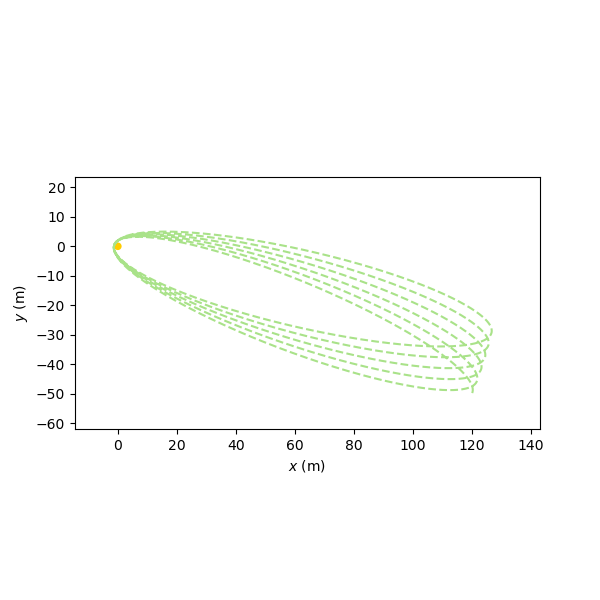

In [3]:
%matplotlib notebook
obj = StaticGeodesicPlotter()
obj.animate(geod, interval=25)
obj.show()